In [3]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.rc('figure', dpi=100, figsize=(10, 5))
plt.rc('font', size=12)

# Lecture 12 – Missing Values, Continued

## DSC 80, Spring 2022

### Announcements

- Discussion 4 is due for extra credit **tomorrow at 11:59PM**.
- Lab 4 is due on **Monday, April 25th at 11:59PM**.
    - No hidden tests, just for this lab! Public notebook tests = Gradescope tests.
    - Check [here](https://campuswire.com/c/G325FA25B/feed/767) for clarifications.
- Project 2 is due on **Saturday, April 30th at 11:59PM**.
- The Midterm Exam is **in-class, in-person on Wednesday, April 27th.** More details to come over the weekend.
    - It will cover Lectures **1-12**, Labs 1-4, Projects 1-2, and Discussions 1-4.
    - Unless you email Suraj beforehand, you **must take the exam during the section you are enrolled in**.
    - A single, two-sided cheat sheet will be allowed.
    - See the [Resources](https://dsc80.com/resources/) tab for past exams, and expect a Spring 2021 Midterm review video from Murali this weekend.
- 🚨 If 80% of the class fills out the **[Mid-Quarter Survey](https://docs.google.com/forms/d/e/1FAIpQLSd9k90fGqPKDRAnHjFBEx5kak_VtvYN5Fq5uPv9jyqrryaKeA/viewform)**, then everyone will receive an extra point on the Midterm Exam. 🚨
    - As of lecture, we're currently under 50%.

### Agenda

- Review: missingness mechanisms.
- Identifying missingness mechanisms using data.
- The Kolmogorov-Smirnov test statistic.

Remember: today's lecture **is in scope** for the Midterm Exam!

## Missingness mechanisms

### Review: missingness mechanisms

- **Missing by design (MD):** Whether or not a value is missing depends entirely on the data in other columns. In other words, if we can always predict if a value will be missing given the other columns, the data is MD.
- **Not missing at random (NMAR, also called NI):** The chance that a value is missing **depends on the actual missing value**!
- **Missing at random (MAR):** The chance that a value is missing **depends on other columns**, but **not** the actual missing value itself.
- **Missing completely at random (MCAR):** The chance that a value is missing is **completely independent** of other columns and the actual missing value.

### Flowchart

A good strategy is to assess missingness in the following order.

<center><b>Missing by design (MD)</b></center>
<center><i>Can I determine the missing value exactly by looking at the other columns? 🤔</i></center>
$$\downarrow$$

<center><b>Not missing at random (NMAR)</b></center>
<center><i>Is there a good reason why the missingness depends on the values themselves? 🤔</i></center>
$$\downarrow$$

<center><b>Missing at random (MAR)</b></center>
<center><i>Do other columns tell me anything about the likelihood that a value is missing? 🤔</i></center>
$$\downarrow$$

<center><b>Missing completely at random (MCAR)</b></center>
<center><i>The missingness must not depend on other columns or the values themselves. 😄</i></center>

### Discussion Question

In each of the following examples, decide whether the missing data are MD, NMAR, MAR, or MCAR:

* A table for a medical study has columns for `'gender'` and `'age'`. **`'age'` has missing values**.
* Measurements from the Hubble Space Telescope are **dropped during transmission**.
* A table has a single column, `'self-reported education level'`, **which contains missing values**.
* A table of grades contains three columns, `'Version 1'`, `'Version 2'`, and `'Version 3'`. **$\frac{2}{3}$ of the entries in the table are `NaN`.**


### Why do we care again?

- If a dataset contains missing values, it is likely not an accurate picture of the data generating process.
- By identifying missingness mechanisms, we can best **fill in** missing values, to gain a better understanding of the DGP.

### Formal definition: MCAR

Suppose we have:
- A dataset $Y$ with observed values $Y_{obs}$ and missing values $Y_{mis}$.
- A parameter $\psi$ that represents all relevant information that is not part of the dataset.

Data is **missing completely at random** (MCAR) if 

$$\text{P}(\text{data is present} \: | \: Y_{obs}, Y_{mis}, \psi) = \text{P}(\text{data is present} \: | \: \psi)$$

That is, adding information about the dataset doesn't change the likelihood data is missing!

### Formal definition: MAR

Suppose we have:
- A dataset $Y$ with observed values $Y_{obs}$ and missing values $Y_{mis}$.
- A parameter $\psi$ that represents all relevant information that is not part of the dataset.

Data is **missing at random** (MCAR) if 

$$\text{P}(\text{data is present} \: | \: Y_{obs}, Y_{mis}, \psi) = \text{P}(\text{data is present} \: | \: Y_{obs},  \psi)$$

That is, MAR data is **actually MCAR**, **conditional** on $Y_{obs}$.

### Formal definition: NMAR

Suppose we have:
- A dataset $Y$ with observed values $Y_{obs}$ and missing values $Y_{mis}$.
- A parameter $\psi$ that represents all relevant information that is not part of the dataset.


Data is **not missing at random** (NMAR) if  

$$\text{P}(\text{data is present} \: | \: Y_{obs}, Y_{mis}, \psi)$$

cannot be simplified. That is, in NMAR data, **missingness is dependent on the missing value** itself.

## Assessing missingness through data

### Assessing missingness through data

- Suppose I believe that the missingness mechanism of a column is NMAR, MAR, or MCAR.
    - I've ruled out missing by design (a good first step).
- Can I determine the missingness mechanism by looking at the data?

### Assessing NMAR

- We can't determine if data is NMAR just by looking at the data, as whether or not data is NMAR depends on the **unobserved data**.
- To establish if data is NMAR, we must:
    - **reason about the data generating process**, or
    - collect more data.

- **Example:** Consider a dataset of survey data of students' self-reported happiness. The data contains PIDs and happiness scores; nothing else. Some happiness scores are missing. **Are happiness scores likely NMAR?**

- **Answer:** Yes. For them to be MAR, there need to be other relevant columns in the dataset, which there are not. For it to be MCAR, we'd need some reason to believe that scores were dropped at random. Without any other information, we must assume that students with lower happiness scores didn't fill out the survey.

### Assessing MAR

- Data is MAR if the missingness only depends on **observed** data.
- After reasoning about the data generating process, if you establish that data is not NMAR, then it must be either MAR or MCAR.
- The more columns we have in our dataset, the "weaker the NMAR effect" is.
    - Adding more columns -> controlling for more variables -> moving from NMAR to MAR.
    - **Example:** With no other columns, income in a census is NMAR. But once we look at location, education, and occupation, incomes are closer to being MAR.

### Assessing MCAR

- For data to be MCAR, the chance that values are missing should not depend on any other column or the values themselves.
- **Example:** Consider a dataset of phones, in which we store the screen size and price of each phone. **Some prices are missing.**

| Phone | Screen Size | Price |
| --- | --- | --- |
| iPhone 13 | 6.06 | 999 |
| Galaxy Z Fold 3 | 7.6 | NaN |
| OnePlus 9 Pro | 6.7 | 799 |
| iPhone 12 Pro Max | 6.68 | NaN |

- If prices are MCAR, then **the distribution of screen size should be the same** for:
    - phones whose prices are missing, and 
    - phones whose prices aren't missing.
- **We can use a permutation test to decide between MAR and MCAR!** We are asking the question, did these two samples come from the same underlying distribution?

### Assessing MCAR

Suppose you have a DataFrame with columns named `'col_1'`, `'col_2'`, ..., `'col_k'`, and want to test whether values in `'col_X'` are MCAR.

The following _pseudocode_ describes an algorithm for testing whether `'col_X'`'s missingness is independent of all other columns in the DataFrame:

```
for i = 1, 2, ..., k, where i != X:
    look at the distribution of col_i when col_X is missing
    look at distribution of col_i when col_X is not missing
    check if these two distributions are the same
    if so, then col_X's missingness doesn't depend on col_i
    if not, col_X is MAR dependent on col_i
if all pairs of distributions were the same, 
then col_X is MCAR
```

We need to make precise what we mean by "the same"!

### Example: Heights

- Let's load in Galton's heights dataset from DSC 10.
- We will start with a complete dataset of child heights, child genders, and parent heights.
- We will then **artifically introduce missing values** such that the values are MCAR.

In [3]:
heights = pd.read_csv('data/midparent.csv')
heights = heights.rename(columns={'childHeight': 'child'})
heights = heights[['father', 'mother', 'gender', 'child']]
heights.head()

,father,mother,gender,child
0,78.5,67.0,male,73.2
1,78.5,67.0,female,69.2
2,78.5,67.0,female,69.0
3,78.5,67.0,female,69.0
4,75.5,66.5,male,73.5


Note that there currently aren't any missing values in `heights`.

In [4]:
heights.isna().mean()

father    0.0
mother    0.0
gender    0.0
child     0.0
dtype: float64

We have three numerical columns – `'father'`, `'mother'`, and `'child'`. Let's visualize them simultaneously.

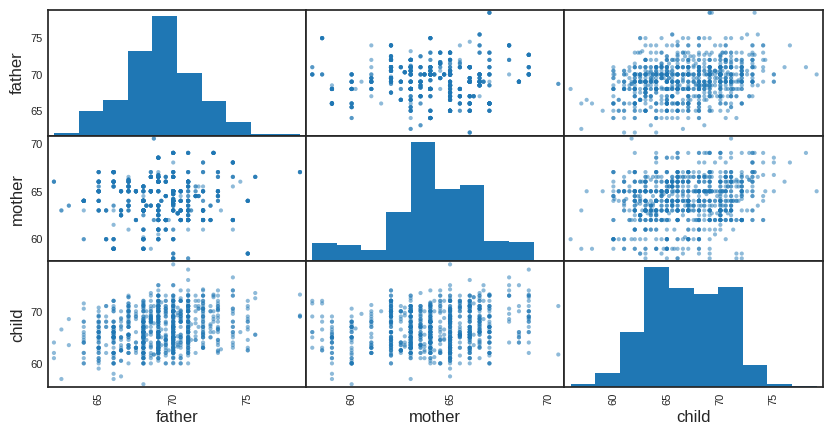

In [5]:
pd.plotting.scatter_matrix(heights.drop('gender', axis=1));

### Simulating MCAR data

- We will make `'child'` MCAR by taking a random subset of `heights` and setting the corresponding `'child'` heights to `np.NaN`.
- This is equivalent to flipping a (biased) coin for each row. 
    - If heads, we delete the `'child'` height.
- **You will not do this in practice!**

In [6]:
np.random.seed(42) # So that we get the same results each time (for lecture)

heights_mcar = heights.copy()
idx = heights_mcar.sample(frac=0.3).index
heights_mcar.loc[idx, 'child'] = np.NaN

In [7]:
heights_mcar.head(10)

,father,mother,gender,child
0,78.5,67.0,male,73.2
1,78.5,67.0,female,69.2
2,78.5,67.0,female,NaN
3,78.5,67.0,female,69.0
4,75.5,66.5,male,73.5
5,75.5,66.5,male,NaN
6,75.5,66.5,female,65.5
7,75.5,66.5,female,NaN
8,75.0,64.0,male,71.0
9,75.0,64.0,female,68.0


In [8]:
heights_mcar.isna().mean()

father    0.000000
mother    0.000000
gender    0.000000
child     0.299786
dtype: float64

Aside: Why is the value for `'child'` in the above Series not exactly 0.3?

### Verifying that child heights are MCAR in `heights_mcar`

- Each row of `heights_mcar` belongs to one of two **groups**:
    - Group 1: `'child'` is missing.
    - Group 2: `'child'` is not missing.
- We need to look at the distributions of every other column – `'gender'`, `'mother'`, and `'father'` – separately for these two groups, and check to see if they are similar.

In [ ]:
heights_mcar.head()

### Comparing null and non-null `'child'` distributions for `'gender'`

In [10]:
gender_dist = (
    heights_mcar
    .assign(child_missing=heights_mcar['child'].isna())
    .pivot_table(index='gender', columns='child_missing', aggfunc='size')
)

gender_dist = gender_dist / gender_dist.sum()
gender_dist

child_missing,False,True
gender,,
female,0.487768,0.478571
male,0.512232,0.521429


- Note that here, each column is a separate distribution that adds to 1.
- The two columns look similar, which is evidence that `'child'`'s missingness does not depend on `'gender'`.
    - Knowing that the child is `'female'` doesn't make it any more or less likely that their height is missing than knowing if the child is `'male'`.

### Comparing null and non-null `'child'` distributions for `'gender'`

- In the previous slide, we saw that the distribution of `'gender'` is similar whether or not `'child'` is missing.
- To make precise what we mean by "similar", we can run a permutation test. We are comparing two distributions:
    1. Distribution of `'gender'` when `'child'` is missing.
    2. Distribution of `'gender'` when `'child'` is not missing.
- What test statistic do we use to compare categorical distributions?

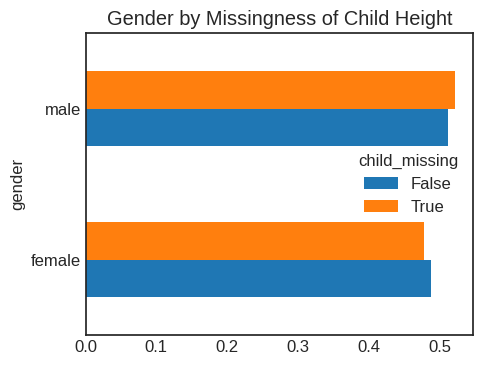

In [32]:
gender_dist.plot(kind='barh', figsize=(5, 4), title='Gender by Missingness of Child Height');

**Answer:** 
- Total variation distance.
- However, with only two categories, the TVD is the same as the absolute difference in proportions for either category.

### Simulation

The code to run our simulation largely looks the same as in previous permutation tests.

In [29]:
shuffled = heights_mcar.copy()
shuffled['child_missing'] = shuffled['child'].isna()

n_repetitions = 500
tvds = []
#for _ in range(n_repetitions):
    
    # Shuffling genders and assigning back to the DataFrame
shuffled['gender'] = np.random.permutation(shuffled['gender'])
    
    # Computing and storing TVD
pivoted = (
    shuffled
    .pivot_table(index='child_missing', columns='gender', aggfunc='size')
    .apply(lambda x: x / x.sum(), axis=1)
)
    
print(pivoted)
shuffled['gender'][~shuffled['child_missing'].values].value_counts() / shuffled['gender'][~shuffled['child_missing'].values].value_counts().sum()
tvd = pivoted.diff().iloc[:, -1].abs().sum() / 2
tvds.append(tvd)
tvds

gender         female  male
child_missing              
False            0.50  0.50
True             0.45  0.55


[0.025000000000000022]

In [30]:
obs_tvd = gender_dist.diff(axis=1).iloc[:, -1].abs().sum() / 2
obs_tvd

0.009196155526430771

### Results

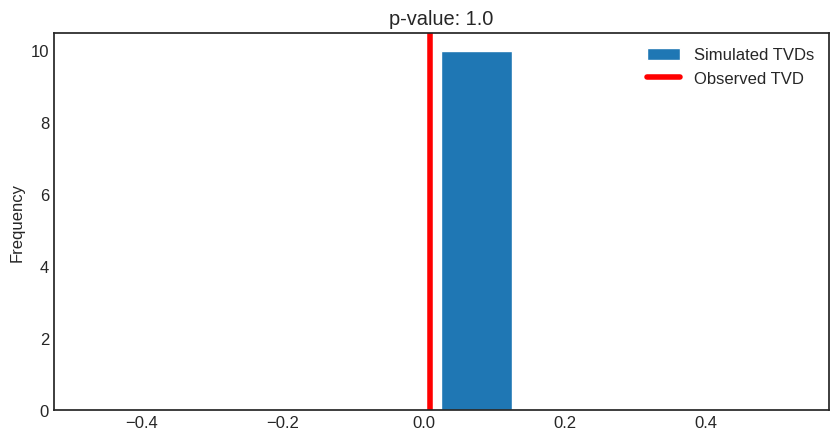

In [31]:
pval = np.mean(tvds >= obs_tvd)

pd.Series(tvds).plot(kind='hist', density=True, ec='w', bins=10, title=f'p-value: {pval}', label='Simulated TVDs')
plt.axvline(x=obs_tvd, color='red', linewidth=4, label='Observed TVD')
plt.legend();

- We fail to reject the null.
- Recall, the null stated that the distribution of `'gender'` when `'child'` is missing is the same as the distribution of `'gender'` when `'child'` is not missing.
- Hence, we conclude that the missingness in the `'child'` column is not dependent on `'gender'`.

### Comparing null and non-null `'child'` distributions for `'father'`

- We again must compare two distributions:
    1. Distribution of `'father'` when `'child'` is missing.
    2. Distribution of `'father'` when `'child'` is not missing.
- If the distributions are similar, we conclude that the missingness of `'child'` is not dependent on the height of the `'father'`.
- We can again use a permutation test.

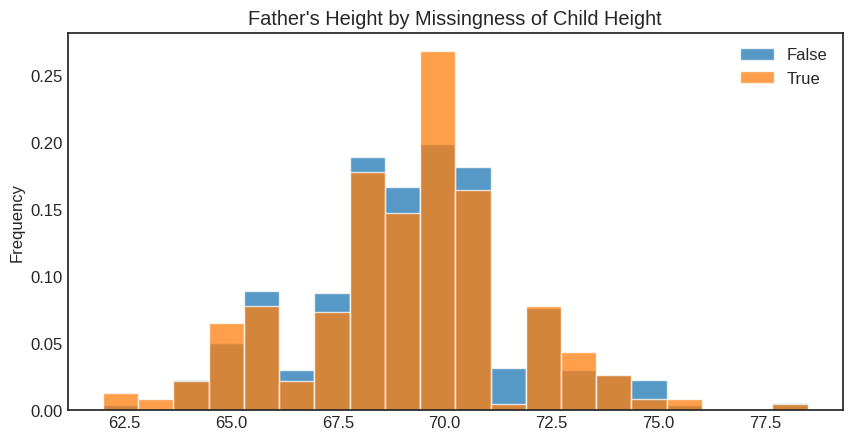

In [33]:
(
    heights_mcar
    .assign(child_missing=heights_mcar['child'].isna())
    .groupby('child_missing')['father']
    .plot(kind='hist', density=True, alpha=0.75, ec='w', bins=20, legend=True, 
          title="Father's Height by Missingness of Child Height")
);

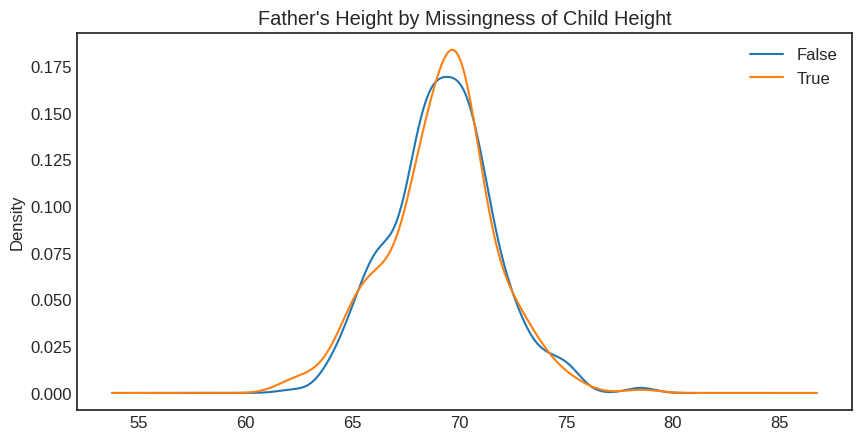

In [34]:
(
    heights_mcar
    .assign(child_missing=heights_mcar['child'].isna())
    .groupby('child_missing')['father']
    .plot(kind='kde', legend=True, title="Father's Height by Missingness of Child Height")
);

### Concluding that `'child'` is MCAR

- We need to run three permutation tests – one for each column in `heights_mcar` other than `'child'`.
- For every other column, if we **fail to reject the null** that the distribution of the column when `'child'` is missing is the same as the distribution of the column when `'child'` is not missing, then we can conclude `'child'` is MCAR.
    - In such a case, its missingness is not tied to any other columns.
    - For instance, knowing a child's father's height or gender doesn't make it any more or less likely that their height is missing.

### Simulating MAR data

Now, we will make `'child'` heights MAR by deleting `'child'` heights according to a random procedure that **depends on other columns**.

In [35]:
np.random.seed(42) # So that we get the same results each time (for lecture)

def make_missing(r):
    rand = np.random.uniform() # Random real number between 0 and 1
    if r['father'] > 72 and rand < 0.5:
        return np.NaN
    elif r['gender'] == 'female' and rand < 0.3:
        return np.NaN
    else:
        return r['child']
    
heights_mar = heights.copy()
heights_mar['child'] = heights_mar.apply(make_missing, axis=1)

In [36]:
heights_mar.head()

,father,mother,gender,child
0,78.5,67.0,male,NaN
1,78.5,67.0,female,69.2
2,78.5,67.0,female,69.0
3,78.5,67.0,female,69.0
4,75.5,66.5,male,NaN


### Comparing null and non-null `'child'` distributions for `'gender'`, again

This time, the distribution of `'gender'` in the two groups is very different.

In [37]:
gender_dist = (
    heights_mar
    .assign(child_missing=heights_mar['child'].isna())
    .pivot_table(index='gender', columns='child_missing', aggfunc='size')
)

gender_dist = gender_dist / gender_dist.sum()
gender_dist

child_missing,False,True
gender,,
female,0.397386,0.881657
male,0.602614,0.118343


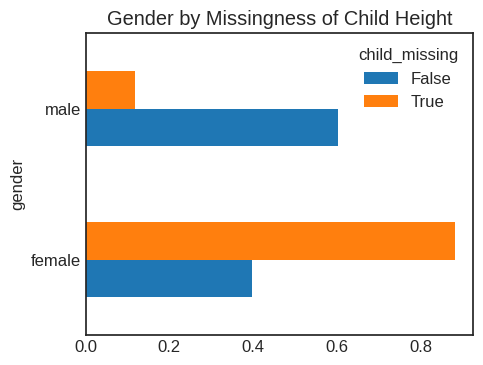

In [38]:
gender_dist.plot(kind='barh', figsize=(5, 4), title='Gender by Missingness of Child Height');

- **Question:** If we take the average of the non-null `'child'` heights in the dataset with missing values, will it be less than or greater than the average `'child'` height in the full dataset?

- **Answer:** 
Because: 
    - `'child'` height tends to be missing much more frequently when the child is `'female'`, and 
    - adult females tend to be shorter than adult males on average, 
    - the average `'child'` height in the dataset with missing values will be **less than** the average `'child'` height in the full dataset. 

### Comparing null and non-null `'child'` distributions for `'father'`, again

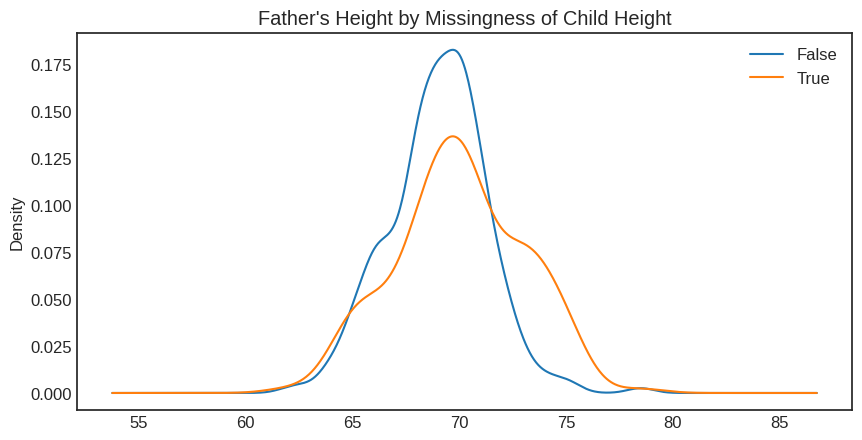

In [39]:
(
    heights_mar
    .assign(child_missing=heights_mar['child'].isna())
    .groupby('child_missing')['father']
    .plot(kind='kde', legend=True, title="Father's Height by Missingness of Child Height")
);

**Observation:**
- The above two distributions look quite different.
    - This is because we artificially created missingness in the dataset in a way that depended on `'father'` and `'gender'`.
- However, their difference in means is likely small.
- If we ran a permutation test with the difference in means as our test statistic, our observed test statistic would be very small.
    - **Using just the difference in means, it is hard to tell these two distributions apart.**

## The Kolmogorov-Smirnov test statistic

### Recap: permutation tests

- Permutation tests help decide whether **two samples came from the same distribution**.
- In a permutation test, we simulate data under the null by **shuffling** either group labels or numerical features.
    - In effect, this **randomly assigns individuals to groups**.
- If the two distributions are **quantitative (numerical)**, we use as our test statistic the **difference in group means or medians**.
- If the two distributions are **qualitative (categorical)**, we use as our test statistic the **total variation distance (TVD)**.

### Difference in means

The difference in means works well in some cases. Let's look at one such case.

Below, we artificially generate two numerical datasets.

In [ ]:
np.random.seed(42) # So that we get the same results each time (for lecture)

N = 1000 # number of samples for each distribution

# Distribution 'A'
distr1 = pd.Series(np.random.normal(0, 1, size=N//2))

# Distribution 'B'
distr2 = pd.Series(np.random.normal(3, 1, size=N//2))

data = pd.concat([distr1, distr2], axis=1, keys=['A', 'B']).unstack().reset_index().drop('level_1', axis=1)
data = data.rename(columns={'level_0': 'group', 0: 'data'})

In [ ]:
meanA, meanB = data.groupby('group')['data'].mean().round(7).tolist()
title = f'mean of A: {meanA}\n mean of B: {meanB}'

data.groupby('group')['data'].plot(kind='kde', legend=True, title=title);

### Discussion Question

- So far, we have used the difference in means as our test statistic in quantitative permutation tests.
- We've concluded that **two distributions were likely different if their means were different**.
- Can you think of two **different** distributions that have the same mean? 🤔

### Different distributions with the same mean

Let's generate two distributions that look very different but have the same mean.

In [17]:
np.random.seed(42) # So that we get the same results each time (for lecture)

N = 1000 # number of samples for each distribution

# Distribution 'A'
a = pd.Series(np.random.normal(0, 1, size=N//2))
b = pd.Series(np.random.normal(4, 1, size=N//2))
distr1 = pd.concat([a,b], ignore_index=True)

# Distribution 'B'
distr2 = pd.Series(np.random.normal(distr1.mean(), distr1.std(), size=N))

data = pd.concat([distr1, distr2], axis=1, keys=['A', 'B']).unstack().reset_index().drop('level_1', axis=1)
data = data.rename(columns={'level_0': 'group', 0: 'data'})
data

,group,data
0,A,0.496714
1,A,-0.138264
2,A,0.647689
3,A,1.523030
4,A,-0.234153
...,...,...
1995,B,4.415344
1996,B,1.959952
1997,B,0.044859
1998,B,1.654233


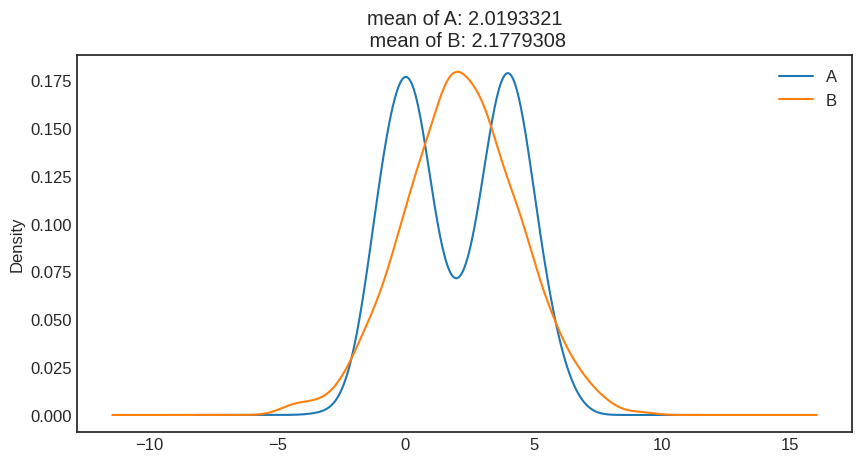

In [3]:
meanA, meanB = data.groupby('group')['data'].mean().round(7).tolist()
title = f'mean of A: {meanA}\n mean of B: {meanB}'

data.groupby('group')['data'].plot(kind='kde', legend=True, title=title);

In this case, if we use the difference in means as our test statistic in a permutation test, we will fail to reject the null that the two distributions are different.

In [ ]:
n_repetitions = 500
shuffled = data.copy()

diff_means = []
for _ in range(n_repetitions):
    
    # Shuffling the data and assigning it back to the DataFrame
    shuffled['data'] = np.random.permutation(shuffled['data'])
    
    # Computing and storing the absolute difference in means
    diff_mean = shuffled.groupby('group')['data'].mean().diff().abs().iloc[-1]
    diff_means.append(diff_mean)
    
diff_means[:10]

In [ ]:
obs_diff = data.groupby('group')['data'].mean().diff().abs().iloc[-1]
pval = np.mean(np.array(diff_means) >= obs_diff)

pd.Series(diff_means).plot(kind='hist', density=True, ec='w', bins=20, title=f'p-value: {pval}', label='Simulated Absolute Differences in Means')
plt.axvline(obs_diff, color='red', label='Observed Difference in Means')
plt.legend();

### Telling quantitative distributions apart

- The difference in means only works as a test statistic in permutation tests **if the two distributions have similar shapes**.
    - It tests to see if one is a shifted version of the other.
- We need a better test statistic to differentiate between quantitative distributions with different shapes.
- In other words, we need a **distance** metric between quantitative distributions.
    - The TVD is a distance metric between categorical distributions.

In [ ]:
data.groupby('group')['data'].plot(kind='kde', legend=True);

### The Kolmogorov-Smirnov test statistic

- The K-S test statistic measures the similarity between two distributions.
- It is defined in terms of the **cumulative distribution function (CDF)** of a given distribution.
    - If $f(x)$ is a distribution, then the CDF $F(x)$ is the proportion of values in distribution $f$ that are less than or equal to $x$.
- The K-S statistic is roughly defined as the **largest difference between two CDFs**.
<center><img src=./imgs/KS2_Example.png width=50%></center>

### Aside: cumulative distribution functions

Let's look at the CDFs of our two synthetic distributions.

In [ ]:
# Original data
data.groupby('group')['data'].plot(kind='kde', legend=True);

0      0.496714
1     -0.138264
2      0.647689
3      1.523030
4     -0.234153
         ...   
995    3.718900
996    5.797687
997    4.640843
998    3.428821
999    4.572583
Name: data, Length: 1000, dtype: float64

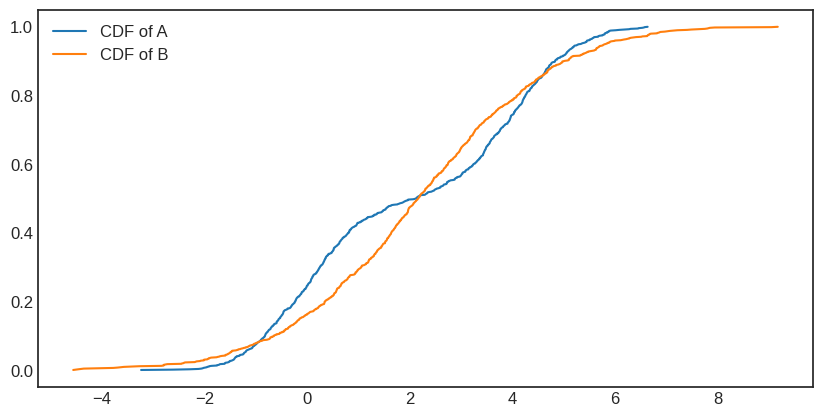

In [5]:
# Try and figure out how this code works!
gpA = data.loc[data['group'] == 'A', 'data']
gpB = data.loc[data['group'] == 'B', 'data']

plt.plot(gpA.value_counts(normalize=True).sort_index().cumsum(), label='CDF of A')
plt.plot(gpB.value_counts(normalize=True).sort_index().cumsum(), label='CDF of B')
plt.legend();
gpA

### The K-S statistic in Python

Fortunately, **we don't need to calculate the K-S statistic ourselves**! Python can do it for us (and you can use this pre-built version in all assignments).

In [6]:
from scipy.stats import ks_2samp

In [ ]:
ks_2samp?

In [7]:
obs_ks = ks_2samp(gpA, gpB).statistic
obs_ks

0.14

We don't know if this number is big or small. We need to run a permutation test!

In [8]:
n_repetitions = 500
shuffled = data.copy()

ks_stats = []
for _ in range(n_repetitions):
    
    # Shuffling the data and assigning it back to the DataFrame
    shuffled['data'] = np.random.permutation(shuffled['data'])
    
    # Computing and storing the K-S statistic
    groups = shuffled.groupby('group')['data']
    ks_stat = ks_2samp(groups.get_group('A'), groups.get_group('B')).statistic
    ks_stats.append(ks_stat)
    
ks_stats[:10]

[0.04, 0.024, 0.053, 0.061, 0.021, 0.03, 0.023, 0.046, 0.026, 0.028]

NameError: name 'obs_diff' is not defined

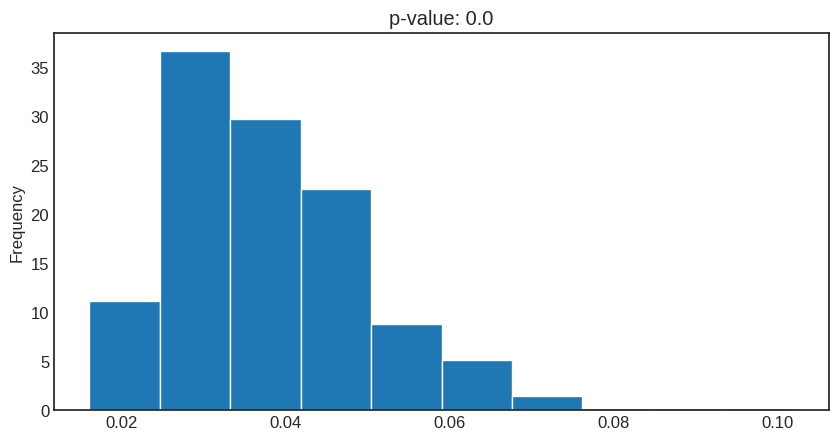

In [18]:
pval = np.mean(np.array(ks_stats) >= obs_ks)

pd.Series(ks_stats).plot(kind='hist', density=True, ec='w', title=f'p-value: {pval}', label='Simulated K-S Statistics')
plt.axvline(obs_diff, color='red', label='Observed K-S Statistic')
plt.legend();

We were able to differentiate between the two distributions using the K-S test statistic!

### `ks_2samp`

* `scipy.stats.ks_2samp` actually returns **both** the statistic **and** a p-value.
* The p-value is calculated using the permutation test we just performed!

In [9]:
ks_2samp(gpA, gpB)

KstestResult(statistic=0.14, pvalue=5.822752148022591e-09)

### Difference in means vs. K-S statistic

- The K-S statistic measures the difference between two distributions.
- It **does not** quantify if one is larger than the other on average, so there are times we still need to use the difference in means.
- Strategy: Always plot the two distributions you are comparing.
    - If the distributions have similar shapes but are centered in different places, use the difference in means (or absolute difference in means).
    - If your alternative hypothesis involves a "direction" (i.e. smoking weights were are on average than non-smoking weights), use the difference in means.
    - If the distributions have different shapes and your alternative hypothesis is simply that the two distributions are different, use the K-S statistic.

## More examples

***Note:*** We are not going to get to these slides in class. They're just here to provide more examples of missingness mechanisms.

### Summary: NMAR 

* Can you make a reasonable case that the differences in missing vs not missing is largely explainable via *observed* data?
    - If yes, then the missing data (column) 'missing at random' and the missing data is 'ignorable' (when handled properly).
    - If no, then the missing data is 'not missing at random' (NMAR), or 'non-ignorable'. You must explicitly model missingness using assumptions on the data generating process.

### Summary: MAR

* If missingness is explainable via *observed* data, then the missing data is 'missing at random' (MAR).
* The distribution of missing data may still look different than the observed data!
    - MAR requires you to understand how the missingness is dependent on other attributes in your data.
* Use permutation tests to assess the dependence of missing data on other attributes.

### Summary: MCAR

* If missingness doesn't depend on any values in the observed data, it is 'unconditionally ignorable' (MCAR).
* MCAR is equivalent to data being MAR, without dependence on any other columns.
* If permutation tests point toward similar distributions of missing vs not-missing data, for *every* other column, then the data *may* be MCAR.
    - Caution: you can't assert the data *are* MCAR, as permutation tests don't allow you to accept the null hypothesis!

### Example: Cars

* We have data on cars that were given tickets.
* For each car, we have their `'vin'` number, `'car_make'`, `'car_year'`, and `'car_color'`.
* **Question:** Is `'car_color'` missing at random, **dependent on `'car_year'`**?
    * Is the distribution of `'car_year'` similar when color is missing vs. not missing?
    * How similar is similar enough?
    
Let's use a permutation test!

In [18]:
cars = pd.read_csv('data/cars.csv')
cars.head()

,vin,car_make,car_year,car_color
0,3D7TT2CT8BG121773,Audi,2008.0,Teal
1,SCBZB25E62C073475,Audi,1996.0,Mauv
2,1FT7W2A69EE682086,NaN,NaN,Turquoise
3,1B3AZ6JZ7AV582128,Ford,2010.0,Goldenrod
4,1GYUCGEF4AR632425,Mazda,1996.0,Purple


In [19]:
# Proportion of car colors missing
cars['car_color'].isna().mean()

0.1542

In [20]:
cars['color_missing'] = cars['car_color'].isna()

In [ ]:
cars.head()

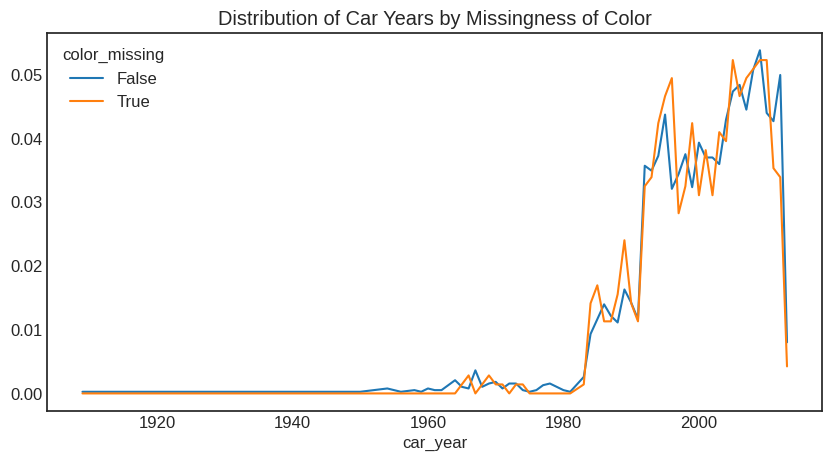

In [21]:
(
    cars
    .pivot_table(index='car_year', columns='color_missing', values=None, aggfunc='size')
    .fillna(0)
    .apply(lambda x: x / x.sum())
    .plot(title='Distribution of Car Years by Missingness of Color')
);

- These distributions look pretty similar. We won't run the permutation test here, but if we did, we'd fail to reject the null. It doesn't seem like the missingness of `'car_color'` depends on `'car_year'`.
- To figure out if the missingness of `'car_color'` is MCAR, we'd need to do a similar analysis for all other columns.

### Missingness of `'car_color'` on `'car_make'`

Let's test whether the missingness of `'car_color'` is dependent on `'car_make'`.

In [ ]:
cars.head()

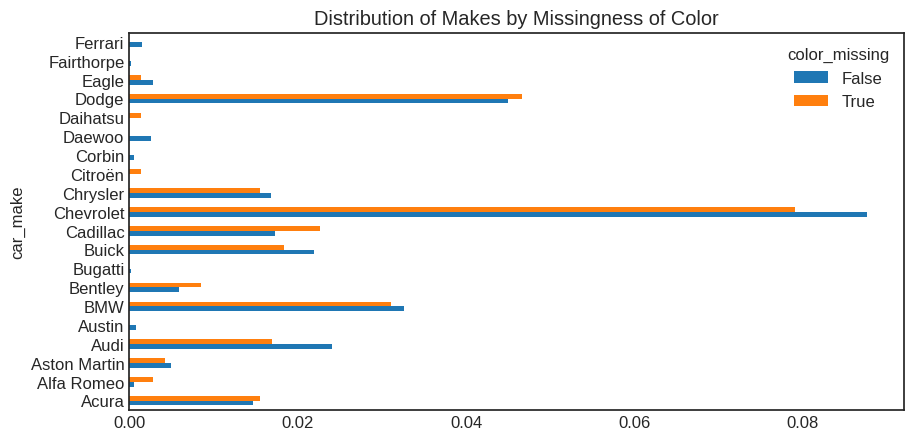

In [22]:
emp_distributions = (
    cars
    .pivot_table(index='car_make', columns='color_missing', values=None, aggfunc='size')
    .fillna(0)
    .apply(lambda x: x / x.sum())
)

# There are too many makes to plot thema ll at once!
emp_distributions.iloc[:20].plot(kind='barh', title='Distribution of Makes by Missingness of Color');

In [23]:
observed_tvd = emp_distributions.diff(axis=1).iloc[:, -1].abs().sum() / 2
observed_tvd

0.10371381974098398

In [24]:
shuffled = cars.copy()[['car_make', 'color_missing']]

n_repetitions = 500
tvds = []

for _ in range(n_repetitions):
    
    # Shuffling the colors and assigning them to the DataFrame
    shuffled['car_make'] = np.random.permutation(shuffled['car_make'])
    
    # Computing and storing the TVD
    pivoted = (
        shuffled
        .pivot_table(index='car_make', columns='color_missing', values=None, aggfunc='size')
        .fillna(0)
        .apply(lambda x: x / x.sum())
    )
    
    tvd = pivoted.diff(axis=1).iloc[:, -1].abs().sum() / 2
    tvds.append(tvd)

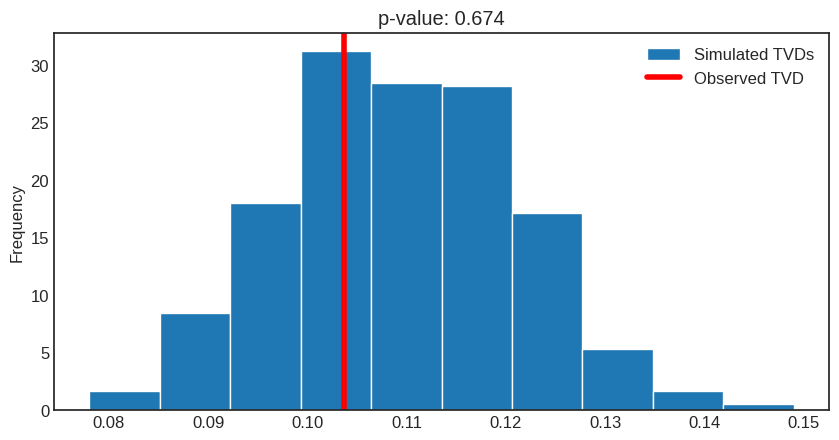

In [25]:
pval = np.mean(tvds >= observed_tvd)

pd.Series(tvds).plot(kind='hist', density=True, ec='w', bins=10, title=f'p-value: {pval}', label='Simulated TVDs')
plt.axvline(x=observed_tvd, color='red', linewidth=4, label='Observed TVD')
plt.legend();

Here, we fail to reject the null that the distribution of `'car_make'` is the same whether or not `'car_color'` is missing.

### Example: Assessing missingness in payments data

* We have payment information for purchases: credit card type, credit card number, date of birth.
* Is the credit card number missing at random dependent on the type of card?

In [4]:
payments = pd.read_csv('data/payment.csv')
payments['cc_isnull'] = payments['credit_card_number'].isna()

In [5]:
payments.head()

,id,credit_card_type,credit_card_number,date_of_birth,cc_isnull
0,1,diners-club-enroute,2.018706e+14,25-Sep-1982,False
1,2,americanexpress,3.737511e+14,08-Jan-1946,False
2,3,jcb,3.570296e+15,NaN,False
3,4,mastercard,5.318327e+15,NaN,False
4,5,maestro,6.759827e+17,20-Apr-1975,False


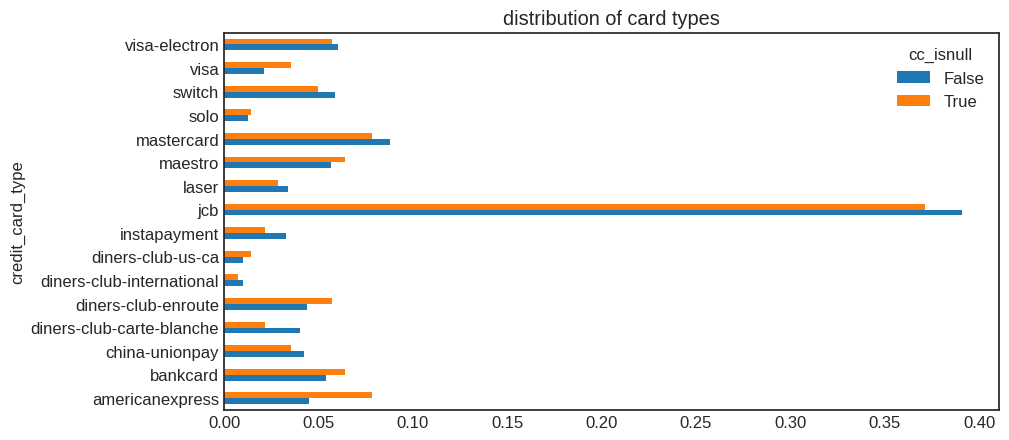

In [6]:
emp_distributions = (
    payments
    .pivot_table(columns='cc_isnull', index='credit_card_type', aggfunc='size')
    .fillna(0)
    .apply(lambda x:x / x.sum())
)

emp_distributions.plot(kind='barh', title='distribution of card types');

In [13]:
observed_tvd = np.sum(np.abs(emp_distributions.diff(axis=1).iloc[:,-1])) / 2
observed_tvd

0.08546365914786964

In [14]:
n_repetitions = 500

payments_type = payments.copy()[['credit_card_type', 'cc_isnull']]
tvds = []
for _ in range(n_repetitions):
    
    shuffled_types = (
        payments_type['credit_card_type']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    shuffled = (
        payments_type
        .assign(**{'Shuffled Types': shuffled_types})
    )
    
    # compute the tvd
    shuffed_emp_distributions = (
        shuffled
        .pivot_table(columns='cc_isnull', index='Shuffled Types', values=None, aggfunc='size')
        .fillna(0)
        .apply(lambda x:x/x.sum())
    )
    
    tvd = np.sum(np.abs(shuffed_emp_distributions.diff(axis=1).iloc[:,-1])) / 2
    # add it to the list of results
    
    tvds.append(tvd)

### Example: assessing missingness in payments data

* Is the credit card number missing at random dependent on the type of card?
* As always, set significance level **beforehand**:
    - How important is the column in the modeling process?
    - How many null values are there?
* Consideration: how important is a faithful imputation?

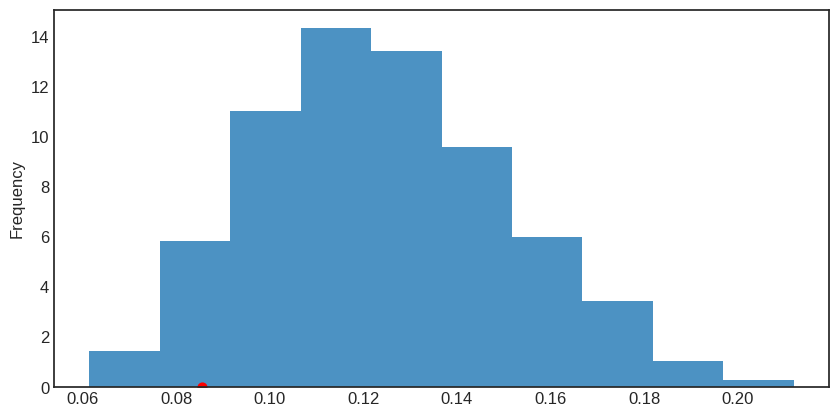

In [15]:
#: visualize
pd.Series(tvds).plot(kind='hist', density=True, alpha=0.8)
plt.scatter(observed_tvd, 0, color='red', s=40);

In [16]:
# p-value
np.count_nonzero(tvds <= observed_tvd) / len(tvds)

0.056

### Example: assessing missingness in payments data

* Is the credit card number missing at random dependent on the age of shopper?
* For quantitative distributions, we've compared means of two groups.

In [14]:
payments['date_of_birth'] = pd.to_datetime(payments.date_of_birth)
payments['age'] = (2019 - payments.date_of_birth.dt.year)

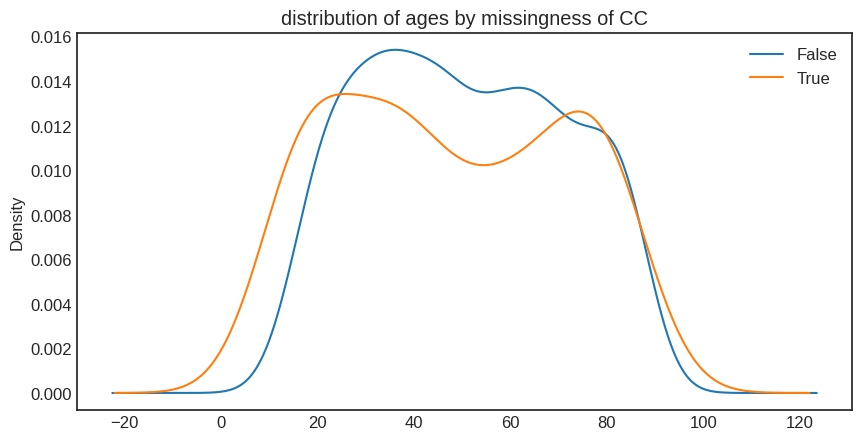

In [15]:
# are the distributions similar?
# Where are the differences? Are they noise, or real?
payments.groupby('cc_isnull').age.plot(kind='kde', title='distribution of ages by missingness of CC', legend=True);

In [16]:
ks_2samp(
    payments.groupby('cc_isnull')['age'].get_group(True),
    payments.groupby('cc_isnull')['age'].get_group(False)
)

KstestResult(statistic=0.12699202780883062, pvalue=0.0344518152440148)

## Summary, next time

### Summary, next time

- We can use permutation tests to verify if a column is MAR vs. MCAR.
    - Create two groups: one where values in a column are missing, and another where values in a column aren't missing.
    - To test the missingness of column X:
        - For every other column, test the null hypothesis "the distribution of (other column) is the same when column X is missing and when column X is not missing."
        - If you fail to reject the null, then column X's missingness does not depend on (other column).
        - If you reject the null, then column X is MAR dependent on (other column).
        - **If you fail to reject the null for all other columns, then column X is MCAR!**

- **Next time:** Using missingness types to **impute** data (not on the Midterm Exam).